In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Testing Graph for the Google Looker Dashboard

In this notebook, I create a graph as a mockup for the Google Looker Dashboard. I used Seaborn and Matplotlib for this purpose.

----
### Evolution of Student Enrollment Over Time

In [2]:
df_enrollment = pd.read_csv("data/urban_institute/ccd_schools_states_enrollment.csv")

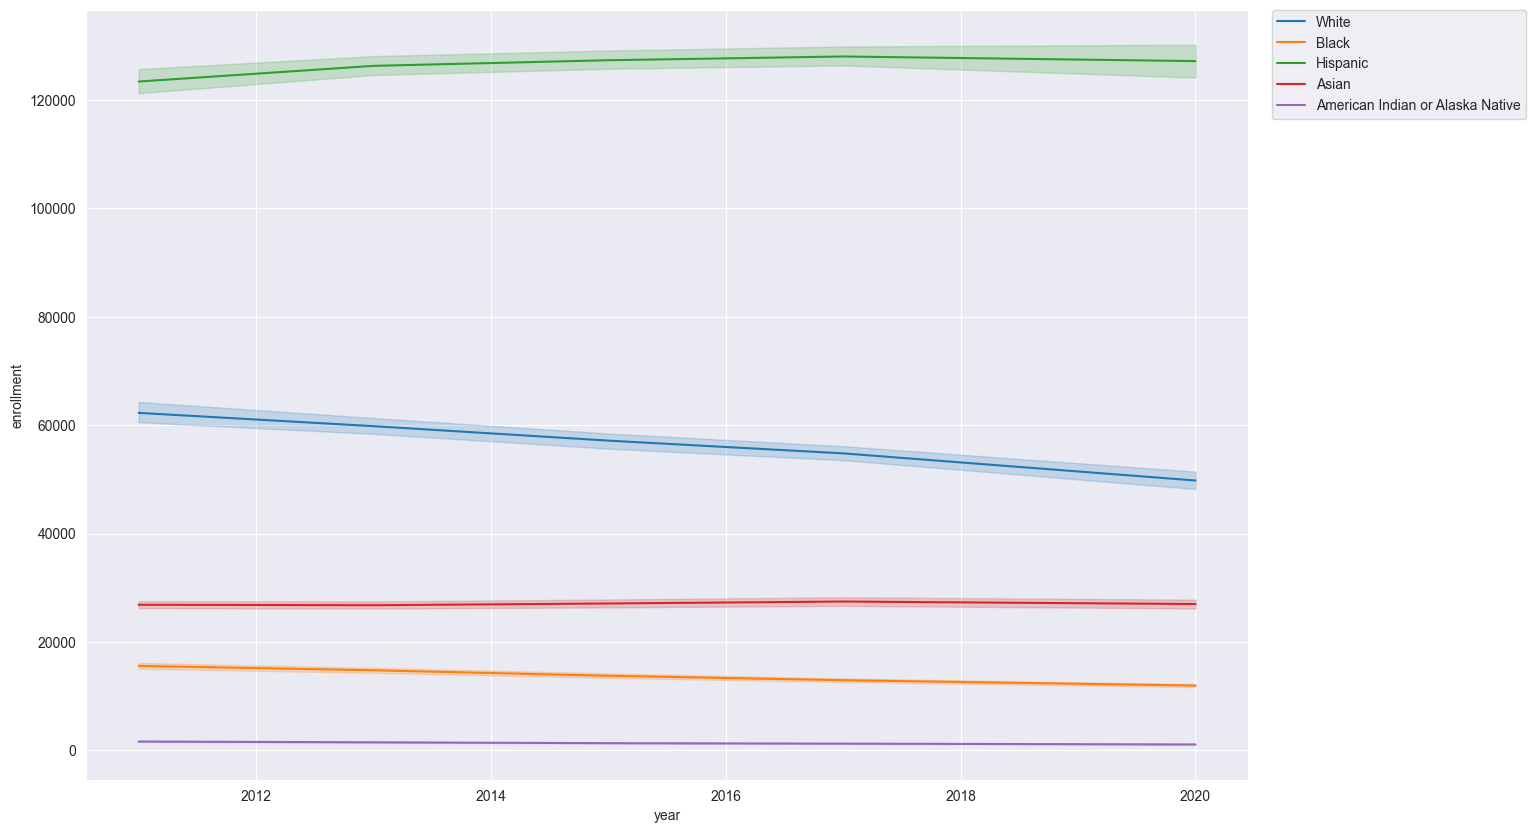

In [3]:
df_enrollment = df_enrollment[df_enrollment["state"] == "California"]
plt.figure(figsize=(15,10))
sns.lineplot(data=df_enrollment, x="year", y="enrollment", hue="race_name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### Student Enrollment by Race and Grade (1-12)

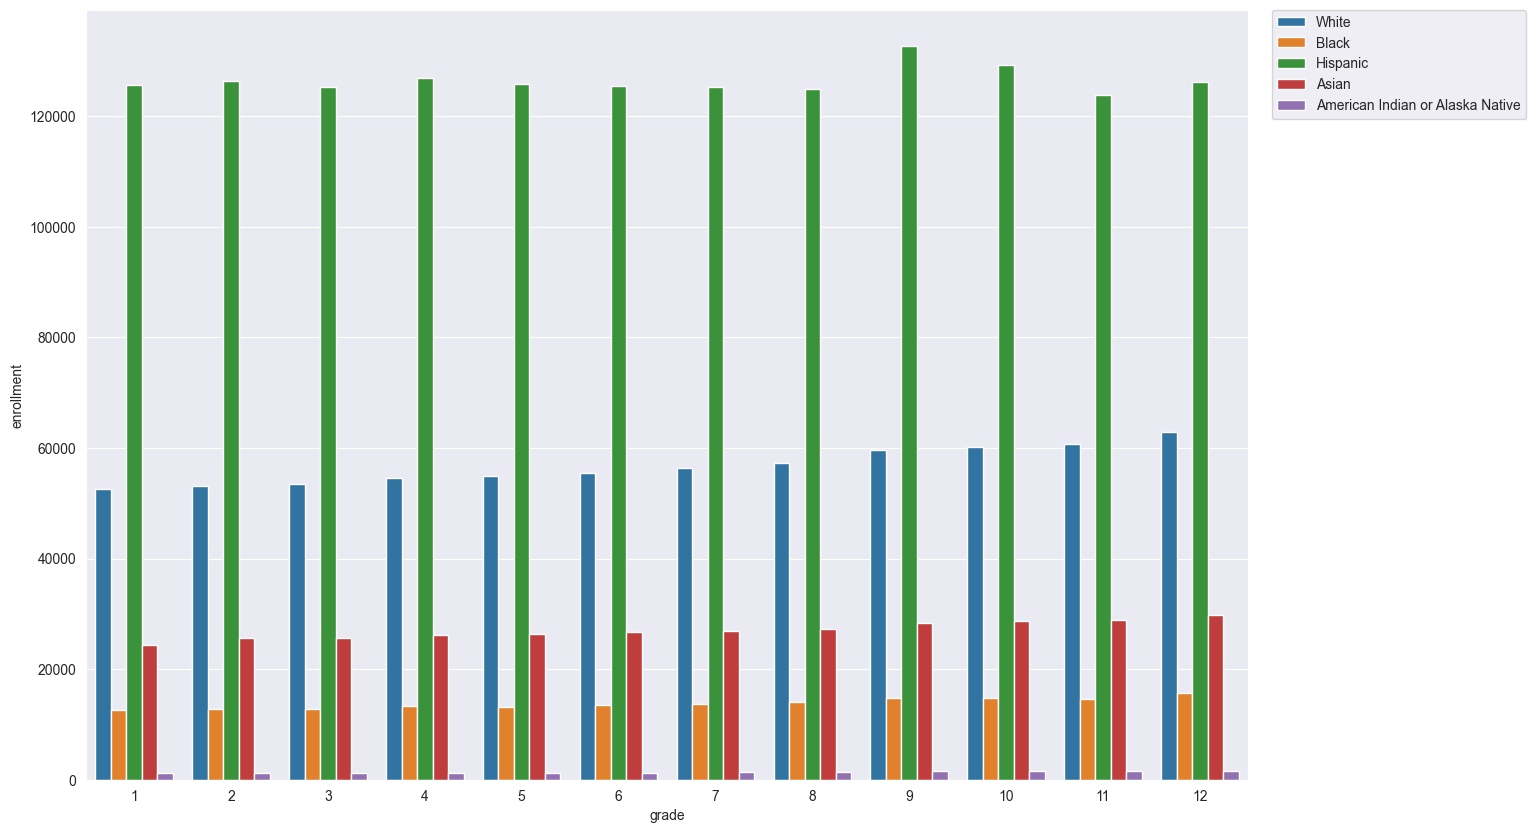

In [4]:
plt.figure(figsize=(15,10))
sns.barplot(df_enrollment, x="grade", y="enrollment", hue="race_name", errorbar=("ci", 0))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

### Comparison of Math and Reading Exam Grades by State

In [5]:
df_assessment_no_race = pd.read_csv("data/urban_institute/edfacts_schools_states_assessments_no_race.csv")
df_assessment_no_race["total_exams"] = df_assessment_no_race["read_test_num_valid"] + df_assessment_no_race["math_test_num_valid"]

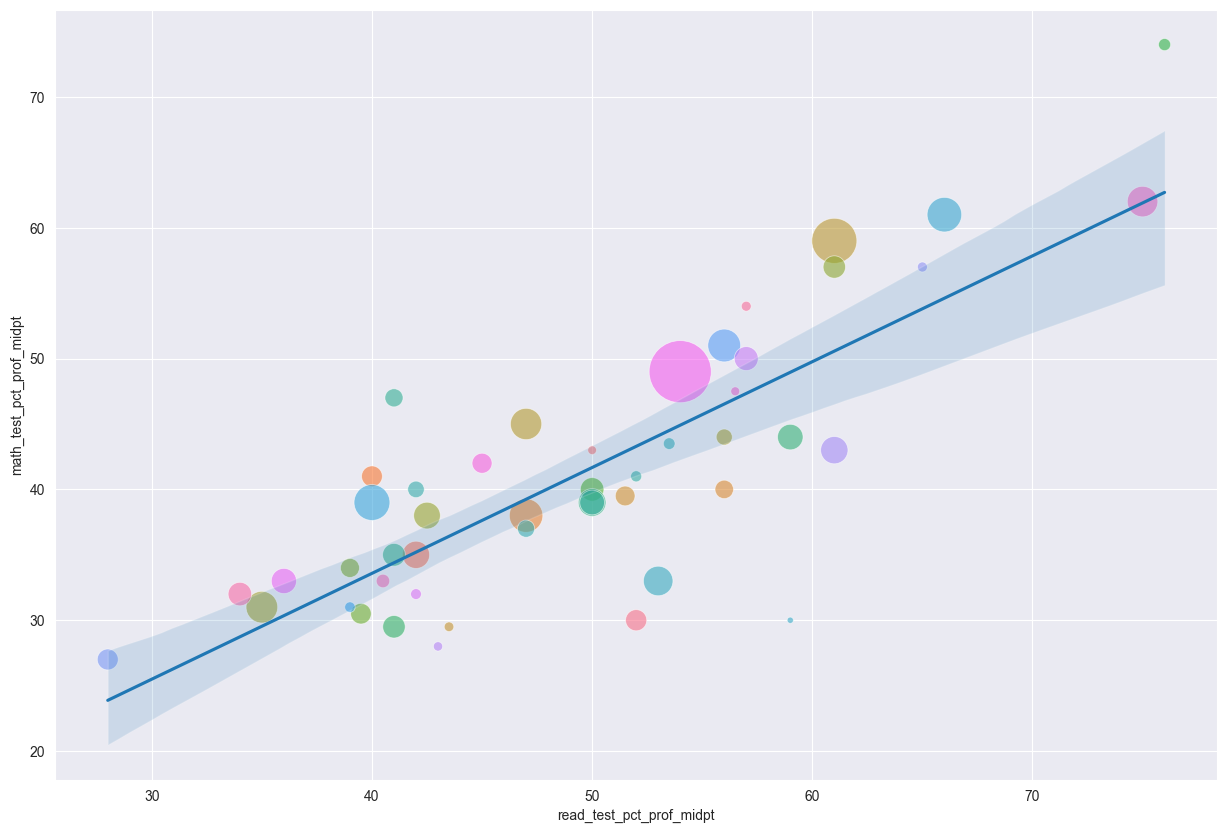

In [6]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df_assessment_no_race[df_assessment_no_race["year"] > 2019], x="read_test_pct_prof_midpt", y="math_test_pct_prof_midpt", hue="state", 
                size="total_exams", legend=None, sizes=(20, 2000), alpha=0.6)
sns.regplot(data=df_assessment_no_race[df_assessment_no_race["year"] > 2019], x="read_test_pct_prof_midpt", y="math_test_pct_prof_midpt", scatter=False, ax=ax);

### Evolution of Grades Over Time

In [7]:
df_assessment_medians = pd.read_csv("data/urban_institute/edfacts_schools_states_assessments_medians.csv")
df_assessment_medians = df_assessment_medians[df_assessment_medians["state"] == "California"]

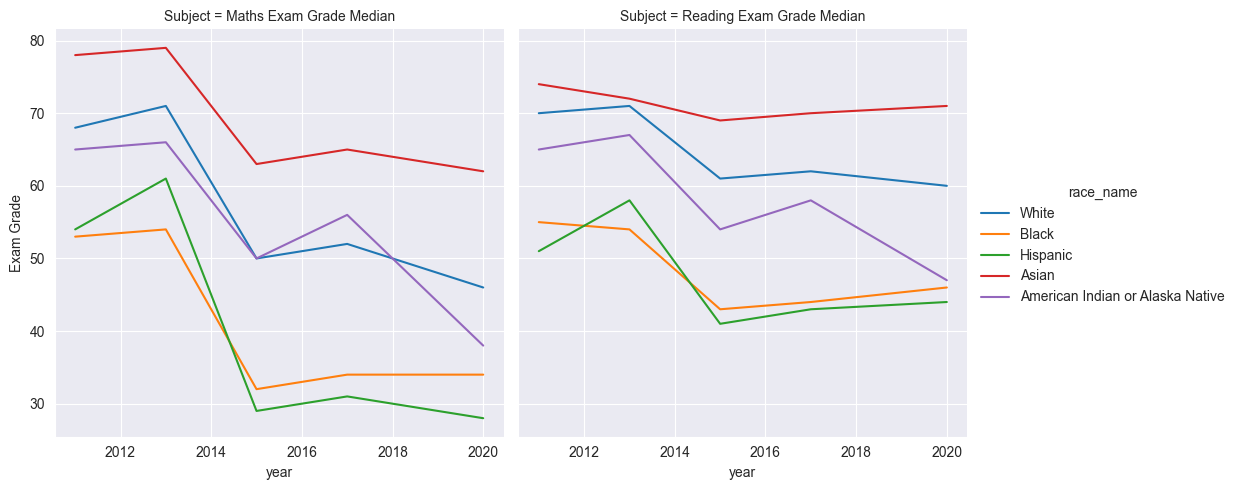

In [8]:
sns.relplot(df_assessment_medians, x="year", y="Exam Grade", hue="race_name", kind="line", col="Subject");

### Evolution of Disciplinary Actions Over Time 

In [9]:
df_discipline = pd.read_csv("data/urban_institute/crdc_schools_states_discipline.csv")
df_discipline = df_discipline[df_discipline["state"] == "California"]

In [10]:
df_discipline["students_suspended"] = df_discipline["students_susp_in_sch"] + df_discipline["students_susp_out_sch"]
df_discipline = df_discipline.groupby(["year"], as_index=False).agg({
    "students_expulsions": "sum",
    "students_corporal_punish": "sum",
    "students_arrested": "sum",
    "transfers_alt_sch_disc": "sum",
    "students_suspended": "sum",
}) 

In [11]:
df_graph = pd.melt(df_discipline, id_vars=["year"], value_vars=['students_expulsions', 'students_corporal_punish', 'students_arrested', 
                                                     'transfers_alt_sch_disc', 'students_suspended'])

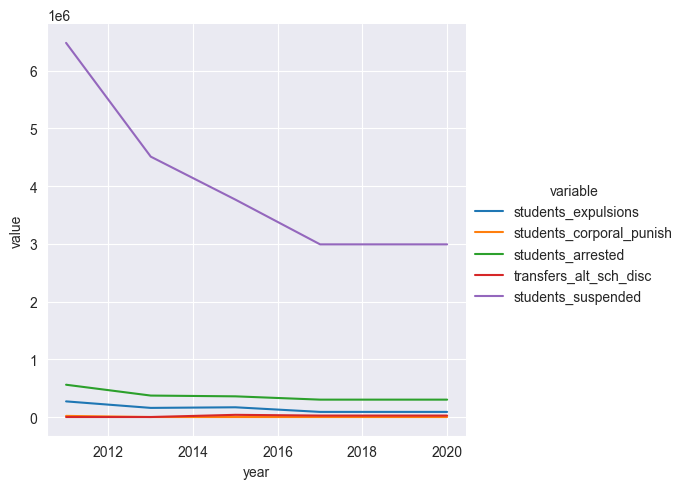

In [12]:
sns.relplot(df_graph, x="year", y="value", hue="variable", kind="line");

In [13]:
df_discipline_no_sex = pd.read_csv("data/urban_institute/crdc_schools_states_discipline_no_sex.csv")
df_discipline_no_sex = df_discipline_no_sex[df_discipline_no_sex["state"] == "California"]
df_discipline_no_sex = df_discipline_no_sex[df_discipline_no_sex["year"] > 2019]

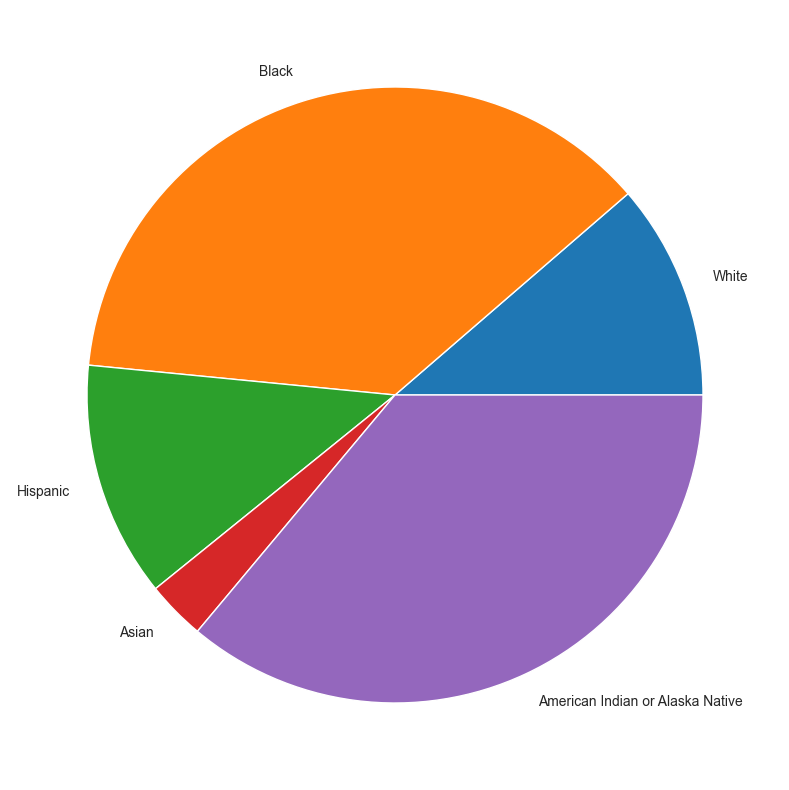

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(df_discipline_no_sex["behavioral_prop_enrollment"].to_numpy(), labels=df_discipline_no_sex["race_name"].to_numpy());

In [15]:
df_discipline = pd.read_csv("data/urban_institute/crdc_schools_states_discipline.csv")
df_discipline = df_discipline[df_discipline["state"] == "California"]
df_discipline = df_discipline[df_discipline["year"] > 2019]

df_discipline = df_discipline.groupby(["year", "sex_name"], as_index=False).agg({
    "behavioral_incidents": "sum",
}) 

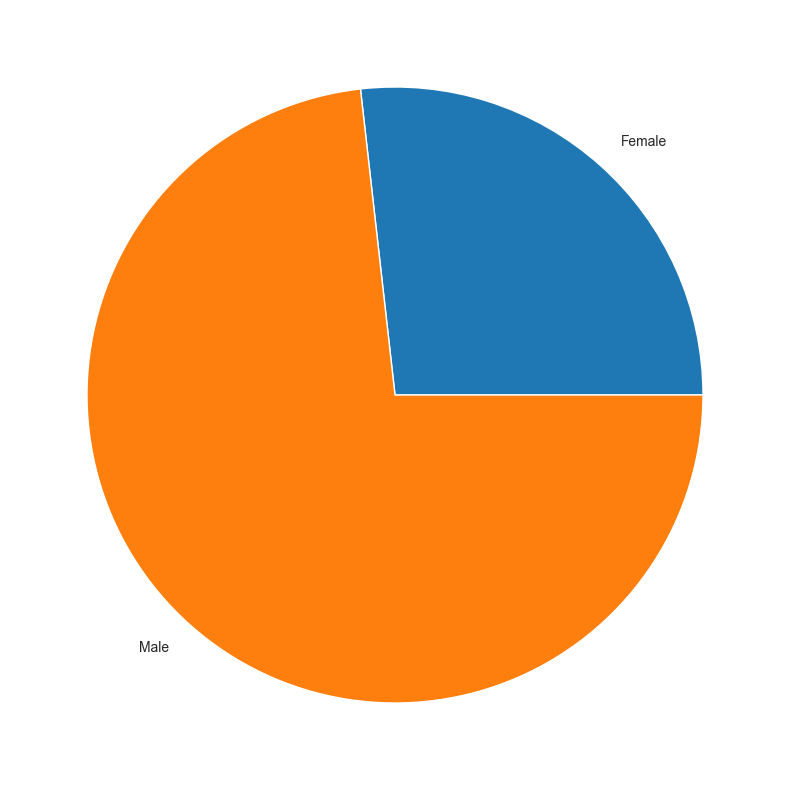

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(df_discipline["behavioral_incidents"].to_numpy(), labels=df_discipline["sex_name"].to_numpy());

### Expenditure per Capita



In [17]:
df_finance_pie = pd.read_csv("./data/urban_institute/crdc_schools_states_finance_pie.csv")
df_finance_pie = df_finance_pie[df_finance_pie["state"] == "California"]

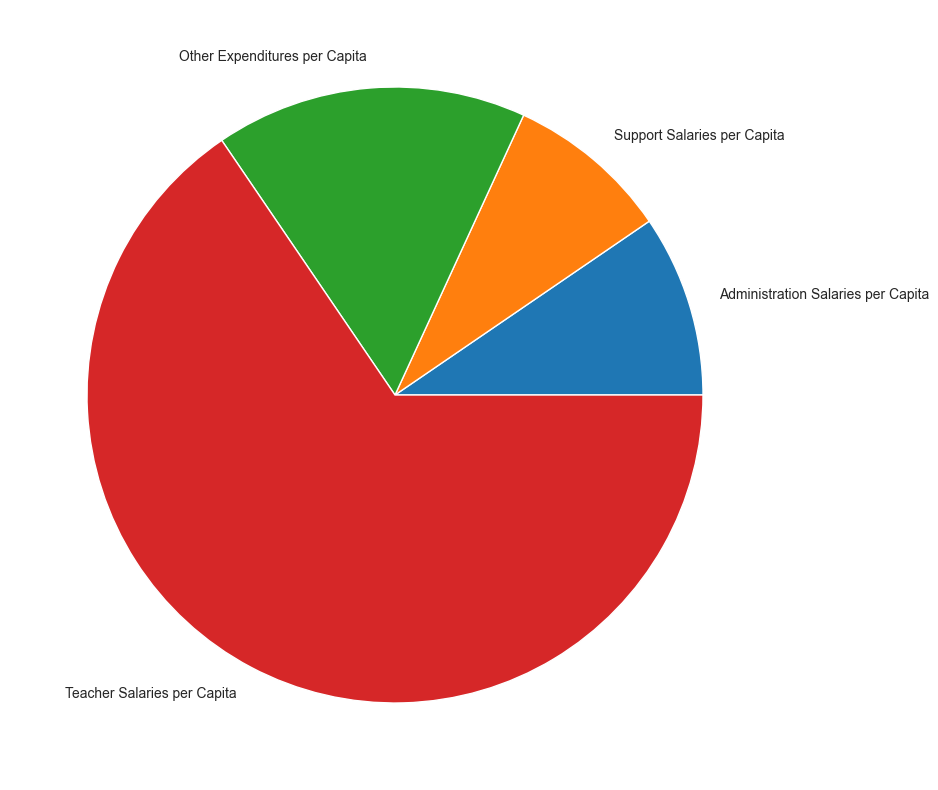

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(df_finance_pie["expenditures"].to_numpy(), labels=df_finance_pie["category"].to_numpy());

### Evolution of Budget per Capita Over Time 

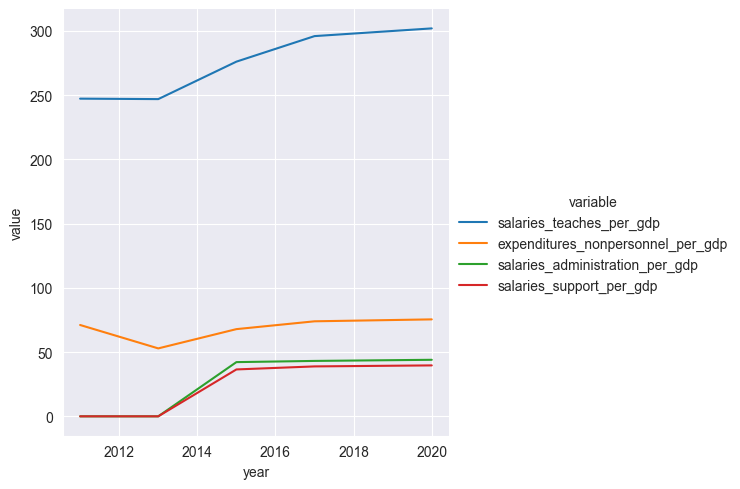

In [19]:
df_finance = pd.read_csv("data/urban_institute/crdc_schools_states_finance.csv")
df_finance = df_finance[df_finance["state"] == "California"]

df_graph = pd.melt(df_finance, id_vars=["year"],
                   value_vars=['salaries_teaches_per_gdp', 'expenditures_nonpersonnel_per_gdp', 'salaries_administration_per_gdp',
                               'salaries_support_per_gdp'])

sns.relplot(df_graph, x="year", y="value", hue="variable", kind="line");